In [2]:
import pandas as pd

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [48]:
print(train.shape)

(891, 12)


In [49]:
print(test.shape)

(418, 11)


In [50]:
train.head(5).T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [52]:
import matplotlib.pyplot as plt

In [53]:
pivot = train.pivot_table(index="Sex",values="Survived")

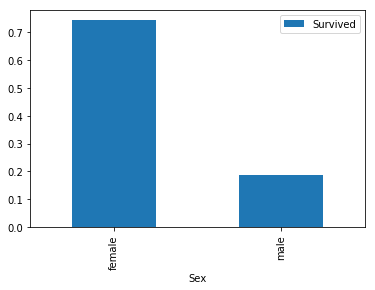

In [54]:
pivot.plot.bar()
plt.show()

In [55]:
pivot = train.pivot_table(index="Pclass", values="Survived")

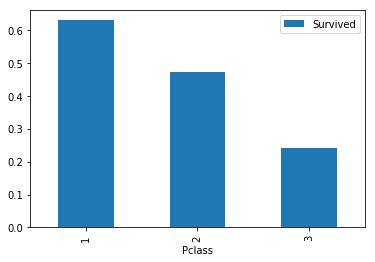

In [56]:
pivot.plot.bar()
plt.show()

In [57]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [58]:
survived = train[train["Survived"]==1]
died = train[train["Survived"]==0]

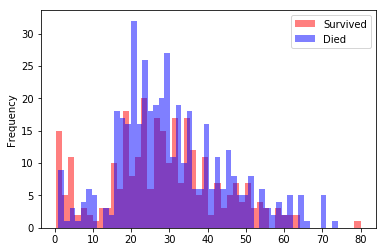

In [59]:
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [60]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)
    df["Age_categories"] = pd.cut(df['Age'], cut_points, labels=label_names)
    return df

In [61]:
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]

In [62]:
label_names = ["Missing","Infant", "Child", "Teenager", 'Young Adult','Adult','Senior']

In [63]:
train = process_age(train, cut_points, label_names)

In [64]:
test = process_age(test, cut_points, label_names)

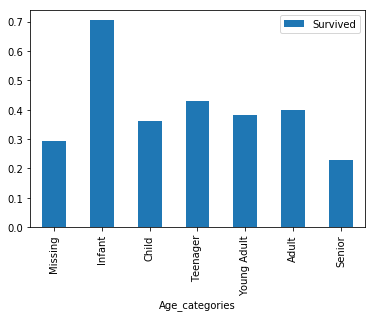

In [65]:
pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [66]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [70]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df,dummies], axis=1)
    return df

In [71]:
columns = ["Pclass","Sex","Age_categories"]

In [72]:
for column in columns:
    train = create_dummies(train,column)
    test = create_dummies(test, column)

In [74]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior'],
      dtype='object')

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression()

In [77]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [78]:
lr = LogisticRegression()

In [79]:
lr.fit(train[columns], train["Survived"])

/Users/vessilli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
from sklearn.model_selection import train_test_split

In [80]:
all_X = train[columns]
all_y = train['Survived']

In [82]:
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.20, random_state=0)

In [86]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

/Users/vessilli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

In [89]:
accuracy

0.8100558659217877

In [92]:
preds = lr.predict_proba(train_X)[:,1]

In [95]:
from sklearn import metrics
import numpy as np

In [110]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp



In [98]:
cv = StratifiedKFold(n_splits=6)

In [99]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

/Users/vessilli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vessilli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vessilli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vessilli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vessilli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

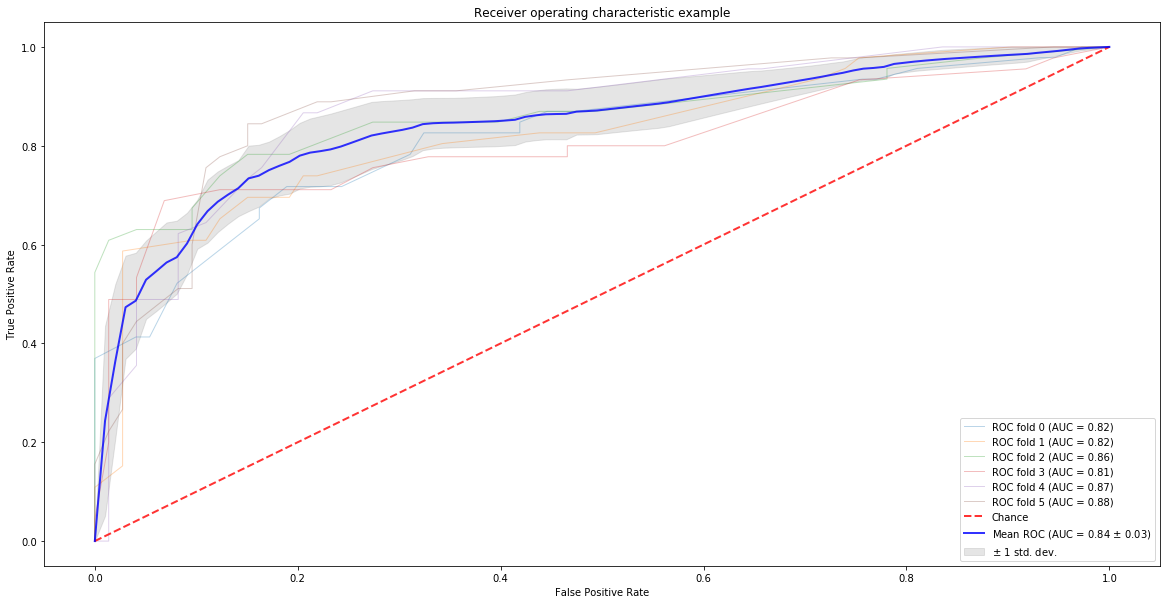

In [114]:
i = 0
plt.figure(figsize=(20,10))
for tr,ts in cv.split(train_X, train_y):
    lr = LogisticRegression()
    lr.fit(train_X.iloc[tr], train_y.iloc[tr])
    prob = lr.predict_proba(train_X.iloc[ts])[:,1]
    fpr, tpr, thresholds = roc_curve(train_y.iloc[ts], prob)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
    

In [108]:
train_y.iloc[[1,2,3]]

439    0
817    0
378    0
Name: Survived, dtype: int64